In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model
from keras.optimizers import Adam

In [31]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [32]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [33]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [34]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 16) (8000,)
(1000, 16) (1000,)


In [36]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (16, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 16, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    # plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = Adam(learning_rate = 0.001), loss = ["mse"], metrics = ["mse"])

    return model

In [37]:
model = create_model()

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
history = model.fit([X_train for i in range (16)], y_train, epochs = 10, batch_size = 32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 218594.9531 - mse: 218594.9531
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20831.9316 - mse: 20831.9316
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 782.2863 - mse: 782.2863
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 362.0763 - mse: 362.0763
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 218.7175 - mse: 218.7175
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 139.8725 - mse: 139.8725
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 93.4472 - mse: 93.4472
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 76.6087 - mse: 76.6087
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 53.0311 - mse: 53.0311
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 41.5220 - mse: 41.5220


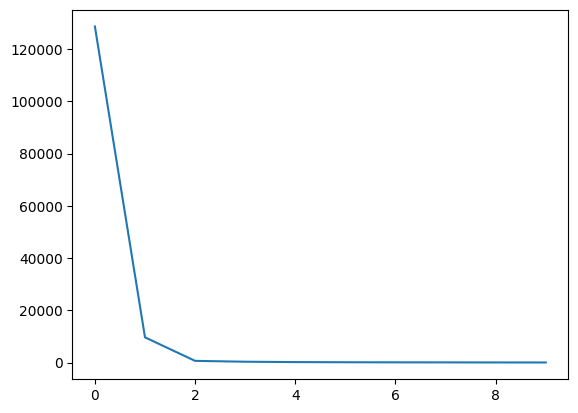

In [39]:
plt.plot(history.history["mse"])

In [40]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
validation_loss = []
history_list = []

In [42]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [43]:
count = 0

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "mse", patience = 5, mode = "min")
    checkpoint = ModelCheckpoint("my_best_model" + str(count + 1) + ".keras", monitor = "mse", verbose = 1, save_best_only = True, mode = "min")
    callbacks = [stop, checkpoint]

    history = model.fit([X_train[train_index] for _ in range (16)], y_train[train_index], epochs = 25,
                        callbacks = callbacks, batch_size = 32, verbose = 0)
    history_list.append(history)
    validation_loss.append(model.evaluate([X_train[val_index] for _ in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 258115.2188 - mse: 258115.2188
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35182.6953 - mse: 35182.6953
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1412.2396 - mse: 1412.2396
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 495.3529 - mse: 495.3529
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 305.6646 - mse: 305.6646
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 205.8951 - mse: 205.8951
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 139.7475 - mse: 139.7475
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 103.8716 - mse: 103.8716
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 80.8628 - mse: 80.8628
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 72.3026 - mse: 72.3026
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 54.9549 - mse: 54.9549
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 

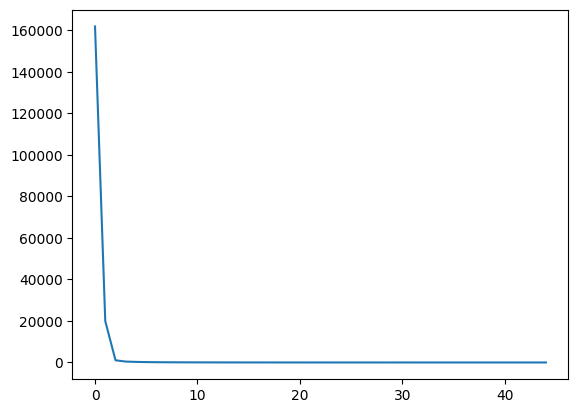

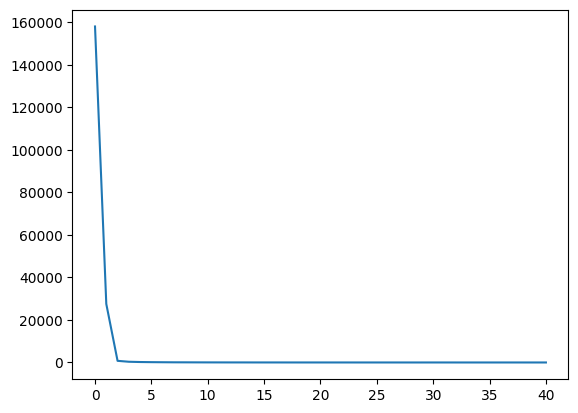

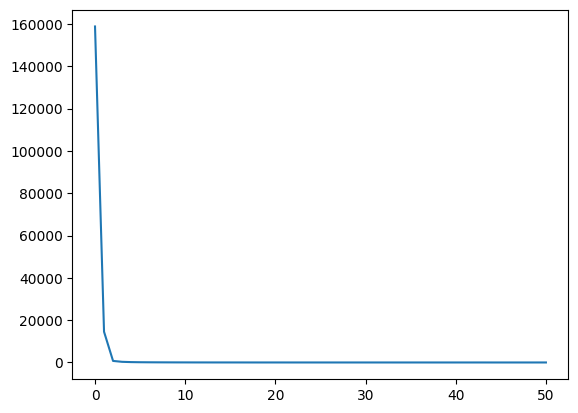

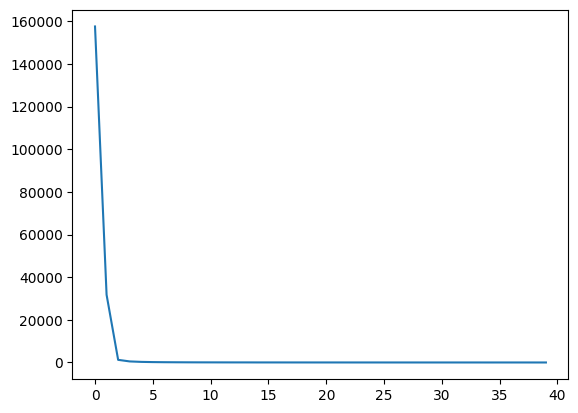

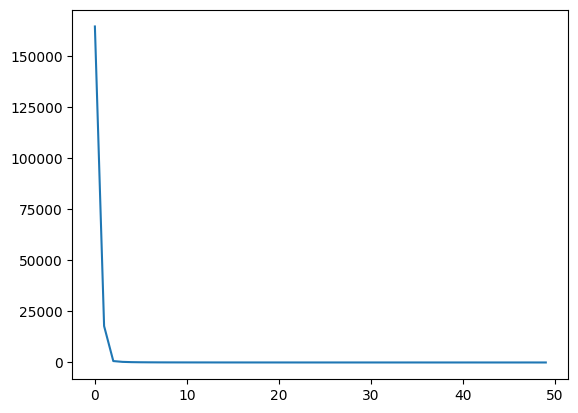

In [44]:
for hist in history_list :
    plt.plot(hist.history["loss"])
    plt.show()

In [45]:
print("average mse and standard deviation: ", np.mean(validation_loss), np.std(validation_loss))

average mse and standard deviation:  6.082046985626221 2.1159988225377186


In [47]:
all_model = []
for i in range (1, 6) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [48]:
model_predict_moyenne = all_model[0].predict([X_test for _ in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test for _ in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [49]:
print("mse : ", (1/1000)*np.sqrt(np.sum((model_predict_moyenne[:, 0] - y_test)**2)))

mse :  0.028657719097901022


In [58]:
for i in range (len(y_test)) :
    print("Pred : ", np.round(model_predict_moyenne[i, 0], 2), "\t\tTrue value : ", np.round(y_test[i], 2), "\t\tDiff : ", np.round(model_predict_moyenne[i, 0] - y_test[i], 2))

Pred :  928.0 		True value :  927.18 		Diff :  0.82
Pred :  426.0 		True value :  425.19 		Diff :  0.81
Pred :  660.0 		True value :  659.32 		Diff :  0.68
Pred :  24.0 		True value :  24.1 		Diff :  -0.1
Pred :  606.0 		True value :  605.94 		Diff :  0.06
Pred :  937.0 		True value :  937.05 		Diff :  -0.05
Pred :  409.0 		True value :  407.12 		Diff :  1.88
Pred :  246.0 		True value :  245.2 		Diff :  0.8
Pred :  245.0 		True value :  244.58 		Diff :  0.42
Pred :  833.0 		True value :  831.24 		Diff :  1.76
Pred :  658.0 		True value :  657.56 		Diff :  0.44
Pred :  489.0 		True value :  488.96 		Diff :  0.04
Pred :  183.0 		True value :  182.16 		Diff :  0.84
Pred :  205.0 		True value :  204.95 		Diff :  0.05
Pred :  957.0 		True value :  956.05 		Diff :  0.95
Pred :  466.0 		True value :  465.89 		Diff :  0.11
Pred :  130.0 		True value :  129.01 		Diff :  0.99
Pred :  215.0 		True value :  214.23 		Diff :  0.77
Pred :  132.0 		True value :  132.19 		Diff :  -0.19
Pred :  48.0 		